In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# concentrate Ebike data and E4 data in one csv file 
df1 = pd.read_csv("export_EBikedata.csv")
df2 = pd.read_csv("bpm_data.csv")
merged = df1.merge(df2, on="time", how="outer").fillna("")
merged.replace("", np.nan, inplace=True)            
merged.dropna(axis=0, how='any',inplace=True)
print(merged)
#merged.to_csv("merged.csv", index=False)


gp = merged.groupby(by=['D5_humanPower','d5_bpm'])
gp = gp.size().reset_index(name='frequence')
# probabilities 
gp['frequence'] /= len(merged)
merged = merged.merge(gp, on=['D5_humanPower','d5_bpm'], how="outer").fillna("")
merged.to_csv("merged.csv", index=False)


                 time  average_humanPower  D5_humanPower  \
0    2019-07-26-21-03               100.0           20.0   
1    2019-07-26-21-04               115.0           23.0   
2    2019-07-26-21-05                61.0           12.0   
3    2019-07-26-21-06                64.0           13.0   
4    2019-07-26-21-07                58.0           12.0   
5    2019-07-26-21-08               137.0           27.0   
6    2019-07-26-21-09               137.0           27.0   
7    2019-07-26-21-10               118.0           24.0   
8    2019-07-26-21-11                97.0           19.0   
9    2019-07-26-21-12                78.0           16.0   
10   2019-07-26-21-13               103.0           21.0   
11   2019-07-26-21-14               120.0           24.0   
12   2019-07-26-21-15                55.0           11.0   
13   2019-07-26-21-16                87.0           17.0   
14   2019-07-26-21-17               112.0           22.0   
15   2019-07-26-21-18               115.

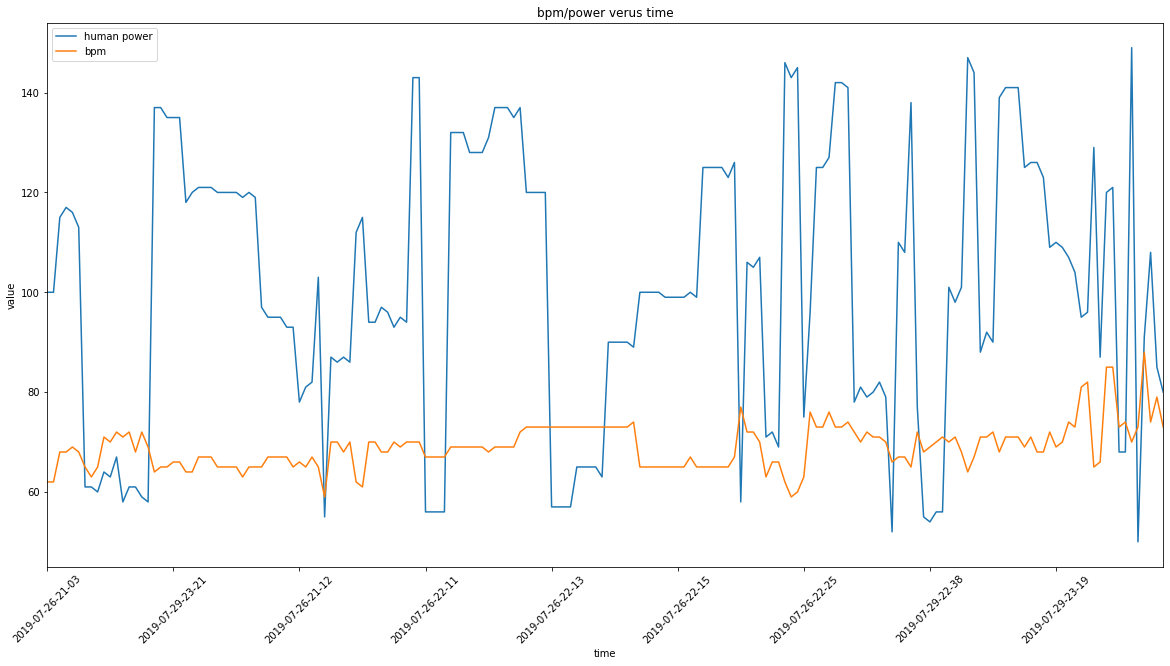

In [4]:
# 2d plot

#gp_2d = merged.groupby(by=['time','average_humanPower','bpm'])
merged.plot(x="time", y=["average_humanPower", "bpm"],label = ["human power", "bpm"],figsize = (20,10))
plt.tick_params(axis='x', rotation=45)
plt.title('bpm/power verus time')
plt.xlabel('time')
plt.ylabel('value')

plt.show()



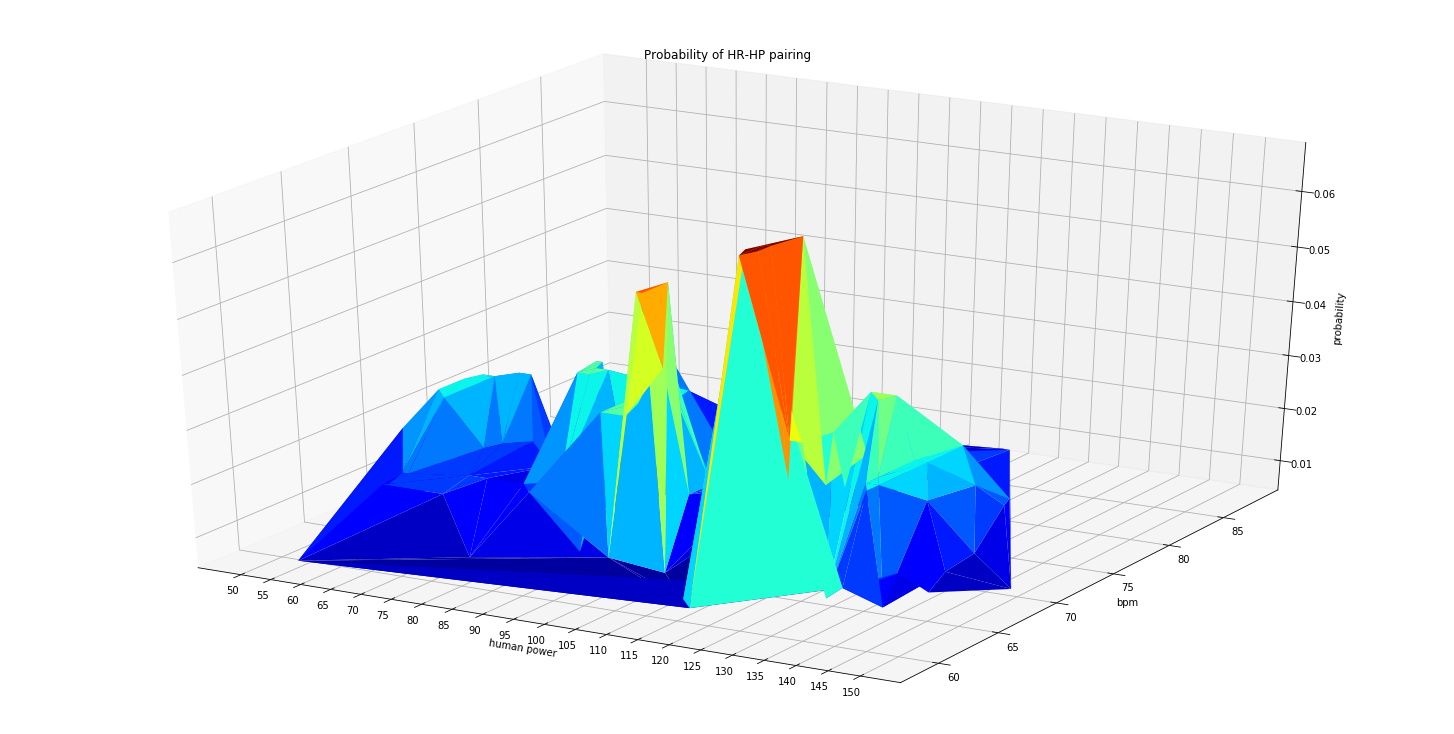

In [5]:
# 3d Plot trisurf
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

test = plt.figure(figsize = (20,10))
test_ax = Axes3D(test)
#test_ax.plot_trisurf(gp.D5_humanPower*5, gp.d5_bpm*5, gp.frequence, cmap=cm.jet, linewidth=0.2)
test_ax.plot_trisurf(merged.average_humanPower, merged.bpm,merged.frequence, cmap=cm.jet, linewidth=0.2)

plt.title('Probability of HR-HP pairing')
test_ax.set_xlabel('human power')
test_ax.set_ylabel('bpm')
test_ax.set_zlabel('probability')

test_ax.xaxis.set_major_locator(MultipleLocator(5))

plt.show()

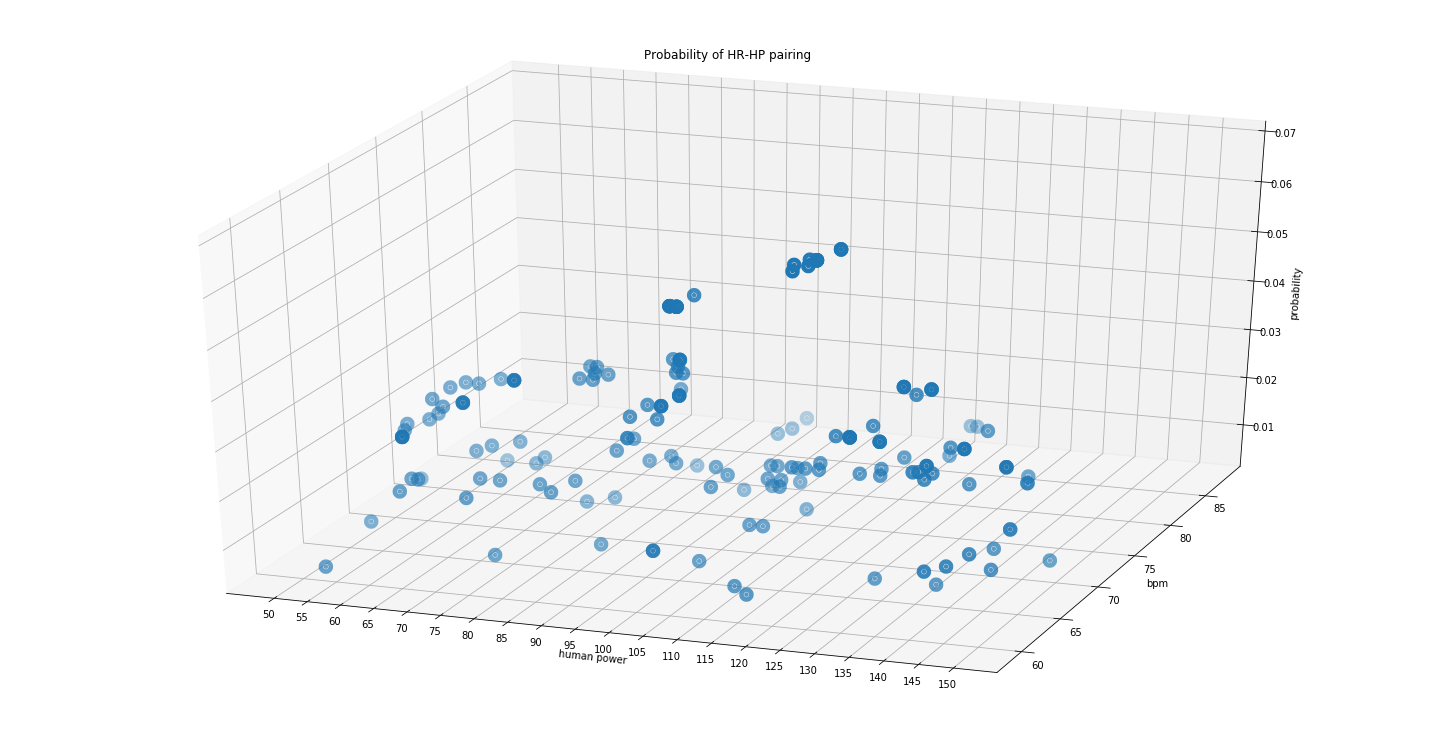

In [6]:
# 3d Plot scatter
# Approach 1
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

test = plt.figure(figsize = (20,10))
test_ax = Axes3D(test,azim = -70)
#test_ax.plot_trisurf(gp.D5_humanPower*5, gp.d5_bpm*5, gp.frequence, cmap=cm.jet, linewidth=0.2)
test_ax.scatter(merged.average_humanPower, merged.bpm,merged.frequence, cmap=plt.cm.rainbow, linewidth=10)

plt.title('Probability of HR-HP pairing')
test_ax.set_xlabel('human power')
test_ax.set_ylabel('bpm')
test_ax.set_zlabel('probability')

test_ax.xaxis.set_major_locator(MultipleLocator(5))

plt.show()

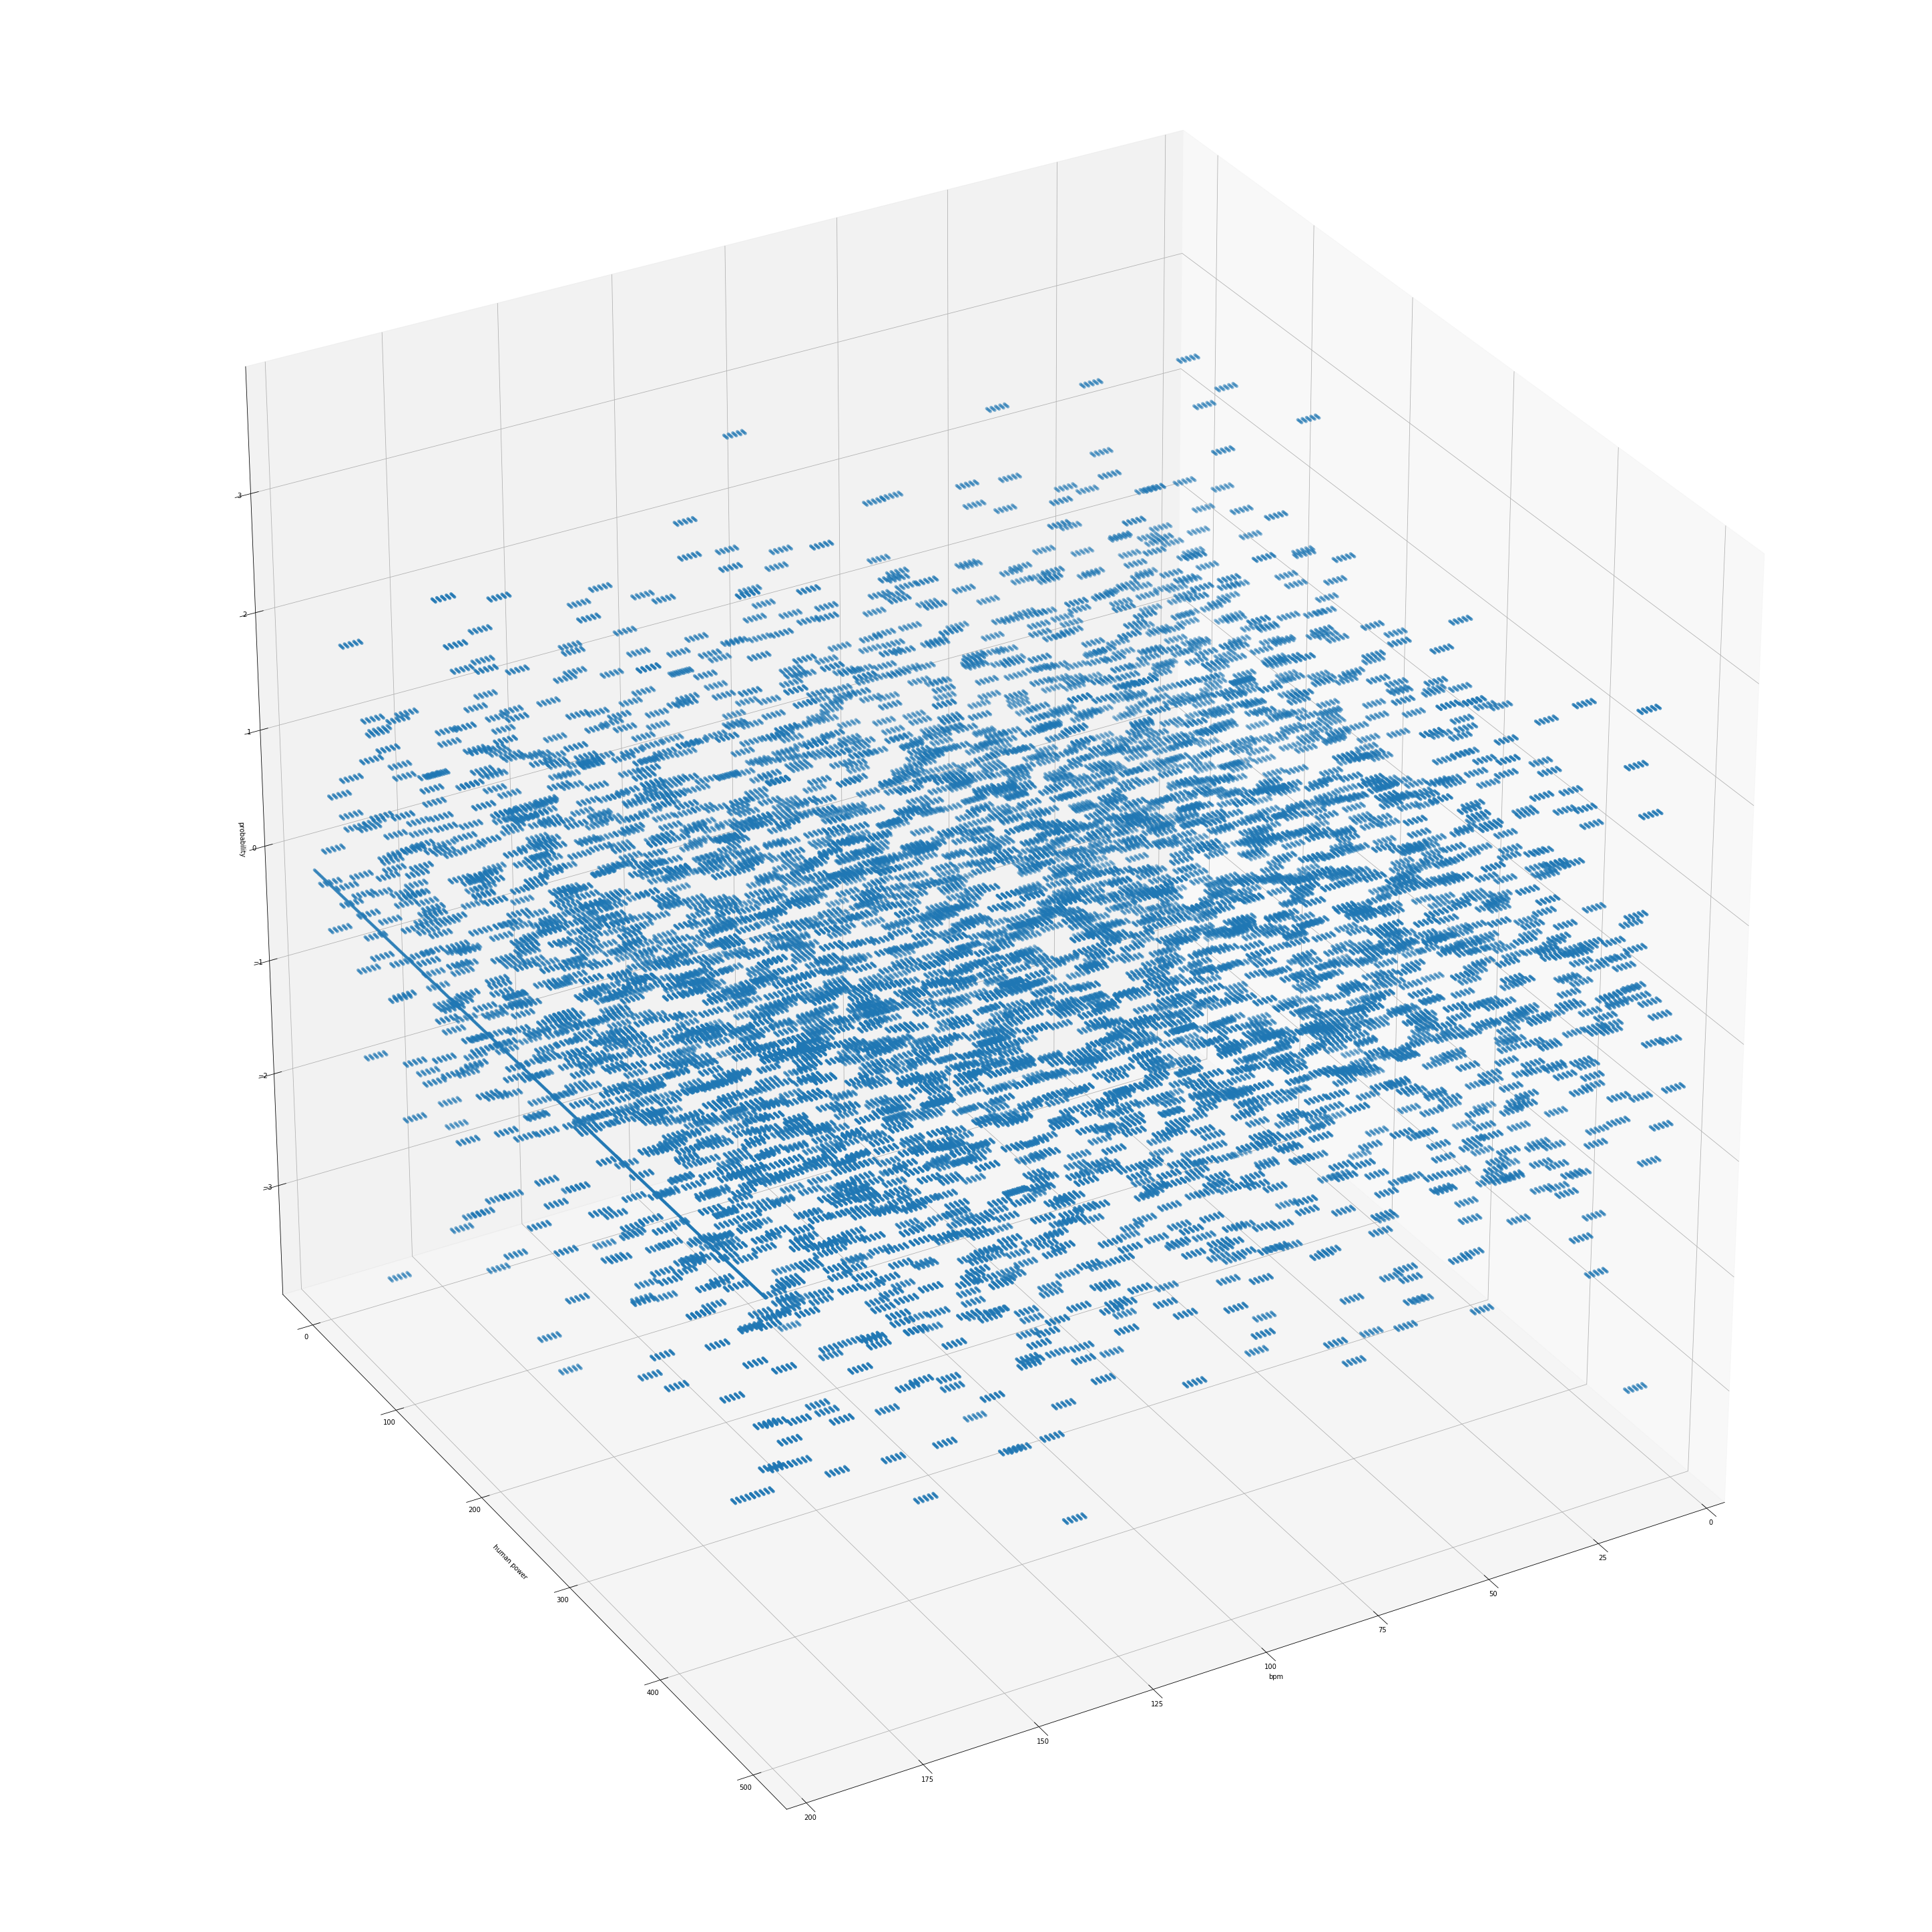

In [9]:
# 3d Plot scatter
# Approach 2
a = np.arange(0,10000,1).reshape(100,100)
a = np.random.randn(100,100)
#print(a)
Matrix = np.zeros((500,500))
for n in range(0,40):
    for nn in range(0,100):
        for i in range(0,5):
            for j in range(0,5):
                Matrix[nn*5+j,n*5+i] = a[nn,n]
#print(Matrix)
df = pd.DataFrame(Matrix)
df.loc[:,201:].replace(0, np.nan, inplace=True)
#print(df)

y = df.index.values
x = df.columns.values
X,Y = np.meshgrid(x,y)
Z = Y*0+X*0+df.loc[df.index.values,df.columns[df.index.values]]

fig = plt.figure(figsize = (40,40))
axes3d = Axes3D(fig,azim = 60)

#axes3d.plot_surface(X, Y, Z,cmap=plt.cm.rainbow)
axes3d.scatter(X, Y, Z, cmap=plt.cm.rainbow, linewidth=0.2)
              
axes3d.set_xlabel('bpm')
axes3d.set_ylabel('human power')
axes3d.set_zlabel('probability')

#axes3d.xaxis.set_major_locator(MultipleLocator(5))


plt.xlim(0, 200)
plt.show()